In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/Users/nguyenphanthaonguyen/Downloads/NOK.csv', header=0, parse_dates=[0], index_col=0)

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())

            Open  High   Low  Close  Adj Close    Volume
Date                                                    
2018-12-12  5.95  6.06  5.93   6.04   5.592633  48348500
2018-12-13  5.98  6.05  5.97   6.03   5.583373  31790800
2018-12-14  5.91  6.01  5.89   5.94   5.500039  17796500
2018-12-17  5.94  5.95  5.85   5.87   5.435223  26578100
2018-12-18  5.88  5.90  5.76   5.78   5.351890  19722400


In [2]:
# 2.  chia train test theo tỉ lệ 8:2
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [3]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1088.496, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1057.612, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1086.711, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1082.875, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1059.548, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1086.432, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1086.111, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1086.497, Time=0.44 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1086.497, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1087.384, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1087.293, Time=0.39 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1084.107, Time=0.09 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1086.239, Time=0.52 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1090.413, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [4]:

y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))


In [5]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[4.8901314  4.89319926 4.89487204 4.89091978 4.89512143 4.89190629
 4.89368869 4.89321058 4.89280916 4.893609   4.8927949  4.89339825
 4.89307852 4.89314896 4.89324099 4.89308017 4.89323734 4.89312454
 4.89318145 4.89317203 4.89315158 4.89318373 4.89315349 4.89317449
 4.89316445 4.89316548 4.89316992 4.89316353 4.89316932 4.89316543]


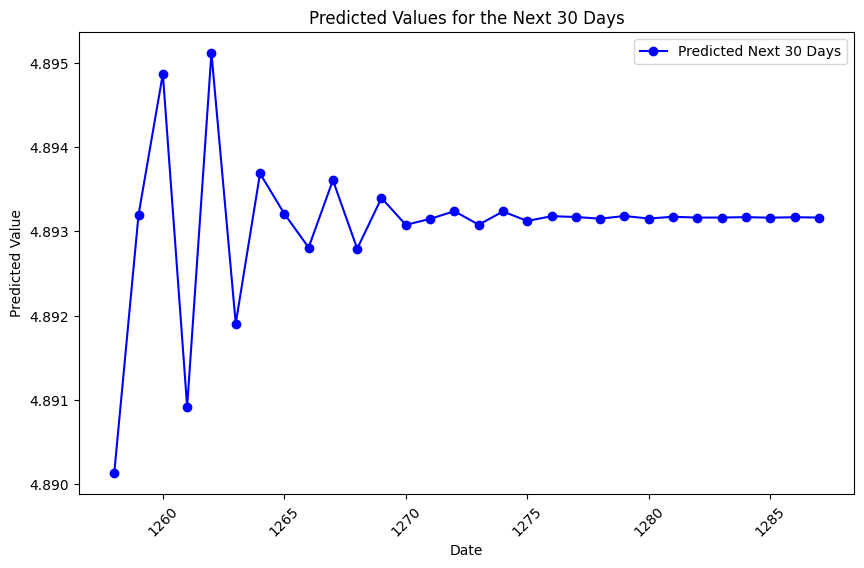

In [6]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 0.8971668974014029
Testing MAPE: 0.1982346791532859
Testing MAE: 0.7484758783551457


Testing RMSE: 0.8971668974014029
Testing MAPE: 0.1982346791532859
Testing MAE: 0.7484758783551457


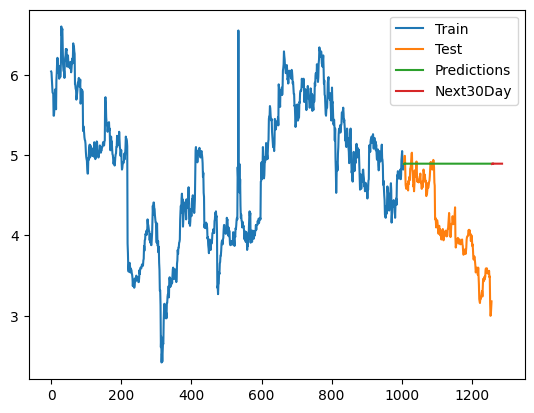

In [8]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [9]:
test_data.index

RangeIndex(start=1006, stop=1257, step=1)